Mrinmayee Gokhale 
RollNo 10
PRN: 1032232136
ML Lab Assg 01


In [2]:
# Objectives:
# To study tree-based classifier
# To implement kfold cv on the give tree-based classifier using python

Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load dataset and split into target and outcome

In [4]:
#Load Dataset
df = pd.read_csv("diabetes.csv")

# Features (all columns except 'Outcome')
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Target (Outcome column)
y = df['Outcome']

# X = df.iloc[:, :-1]  # Features
# y = df.iloc[:, -1]   # Target


In [5]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',    # 'gini' for CART or 'entropy' for C4.5-like
    max_depth=4,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
#Predictions and Evaluation
y_pred = dt_model.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Data: 0.6948051948051948

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154



In [8]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[69 30]
 [17 38]]


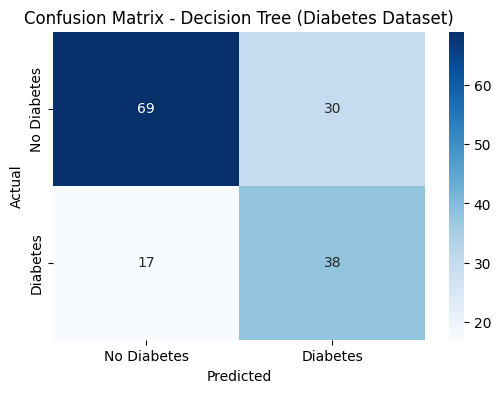

In [9]:
# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Diabetes Dataset)")
plt.show()

In [10]:
#Kfold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_model, X, y, cv=kf)
print("\nScores for each fold:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())


Scores for each fold: [0.69480519 0.75324675 0.73376623 0.78431373 0.73202614]
Mean Accuracy (Cross-Validation): 0.7396316102198455


Accuracy before CV : 69.5%
Accuracy after CV : 73.9%

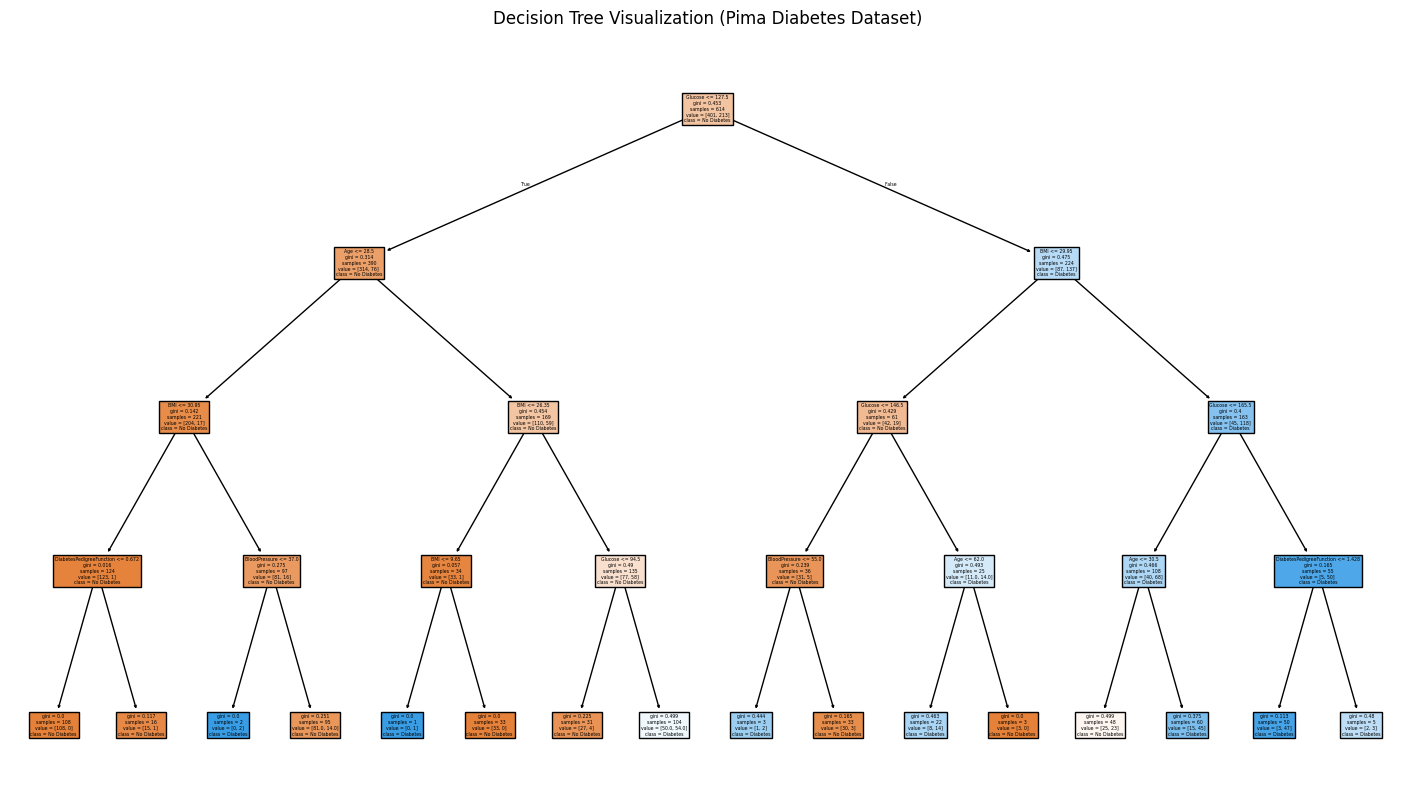

In [11]:
#Decision tree visualization
plt.figure(figsize=(18,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes','Diabetes'], filled=True)
plt.title("Decision Tree Visualization (Pima Diabetes Dataset)")
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV setup
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.7370087428910959


In [13]:
DecisionTreeClassifier().get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

K-Fold: How to get feasible values

k must be ≤ dataset size (obvious, but easy to overlook).
Larger 𝑘
k → less bias, more variance, longer training time.
Smaller 𝑘
k → more bias, less variance, faster training.



Grid Search is a technique to find the best combination of hyperparameters for a machine learning model.

You define a grid (dictionary) of possible values for each parameter.
The algorithm trains and evaluates the model for every possible combination using cross-validation.
It selects the combination that gives the highest score (e.g., accuracy).